In [17]:
import os
import pickle
import numpy as np
from scipy.stats import hmean
import matplotlib.pyplot as plt

In [12]:
folder = 'data/20_40GL'
data = []

for file in os.listdir(folder):
    filepath = f'{folder}/{file}'
    print(f'reading {filepath}')
    with open(filepath, 'rb') as f:
        current_data = pickle.load(f)
        data.append(current_data)

data = np.concatenate(data, axis=1)
data.shape


reading data/20_40GL/100_500_experimentPcorrGLCV40.bin
reading data/20_40GL/100_500_2experimentPcorrGLCV40.bin
reading data/20_40GL/400_500_3experimentPcorrGLCV40.bin
reading data/20_40GL/400_500_4experimentPcorrGLCV40.bin


(9, 1000, 500, 4, 1)

In [14]:
def prepare_data_GL(data):
    exp_combined = data.reshape((9, -1, 4, 1))
    fdr_c, fomr_c, tnr_c, tpr_c = [], [], [], []
    bacc_c, f1_c, mcc_c = [], [], []

    for i in range(9):
        tns = exp_combined[i, :, 0, :]
        fns = exp_combined[i, :, 1, :]
        fps = exp_combined[i, :, 2, :]
        tps = exp_combined[i, :, 3, :]

        tnr = tns / (fps + tns)
        tpr = tps / (fns + tps)
        fdr = fps / (fps + tps)
        fomr = fns / (fns + tns)

        fdr_f = np.nan_to_num(fdr)
        fomr_f = np.nan_to_num(fomr)
        tnr_f = np.nan_to_num(tnr, nan=1)
        tpr_f = np.nan_to_num(tpr, nan=1)

        bacc = (tpr + tnr) / 2
        f1 = hmean([1 - fdr_f, tpr_f], axis=0)

        mcc_first = tpr_f * tnr_f * (1 - fdr_f) * (1 - fomr_f)
        mcc_second = (1 - tpr_f) * (1 - tnr_f) * fomr_f * fdr_f
        mcc = np.sqrt(mcc_first) - np.sqrt(mcc_second)

        fdr_c.append(fdr_f.mean(axis=0))
        fomr_c.append(fomr_f.mean(axis=0))
        tnr_c.append(tnr_f.mean(axis=0))
        tpr_c.append(tpr_f.mean(axis=0))

        bacc_c.append(bacc.mean(axis=0))
        f1_c.append(f1.mean(axis=0))
        mcc_c.append(mcc.mean(axis=0))

    fdr_c, fomr_c, tnr_c, tpr_c = np.stack(fdr_c), np.stack(fomr_c), np.stack(tnr_c), np.stack(tpr_c)
    bacc_c, f1_c, mcc_c = np.stack(bacc_c), np.stack(f1_c), np.stack(mcc_c)
    
    return fdr_c, fomr_c, tnr_c, tpr_c, bacc_c, f1_c, mcc_c

In [15]:
fdr_c, fomr_c, tnr_c, tpr_c, bacc_c, f1_c, mcc_c = prepare_data_GL(data)

/tmp/ipykernel_1894/1913456623.py:14: RuntimeWarning: invalid value encountered in divide
  fdr = fps / (fps + tps)


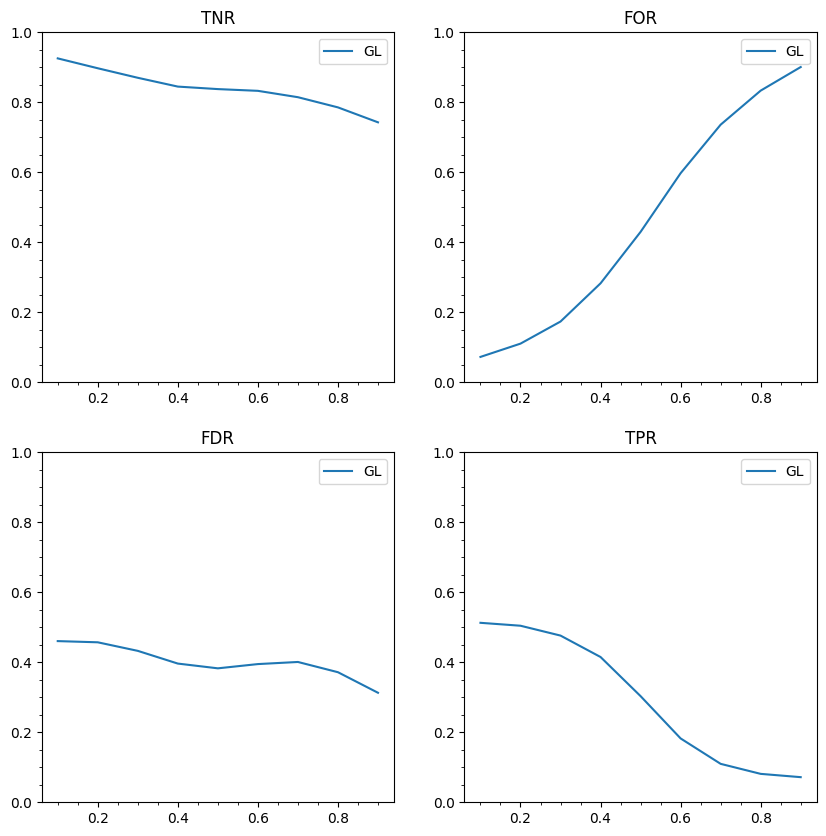

In [19]:
density_list = np.arange(0.1, 1, 0.1)

plt.subplot(2, 2, 1)
plt.plot(density_list, tnr_c[:, 0], label='GL')
plt.title('TNR')
plt.minorticks_on()
plt.ylim((0, 1))
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(density_list, fomr_c[:, 0], label='GL')
plt.title('FOR')
plt.minorticks_on()
plt.ylim((0, 1))
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(density_list, fdr_c[:, 0], label='GL')
plt.title('FDR')
plt.minorticks_on()
plt.ylim((0, 1))
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(density_list, tpr_c[:, 0], label='GL')
plt.title('TPR')
plt.minorticks_on()
plt.ylim((0, 1))
plt.legend()
plt.gcf().set_size_inches((10, 10))
plt.show()

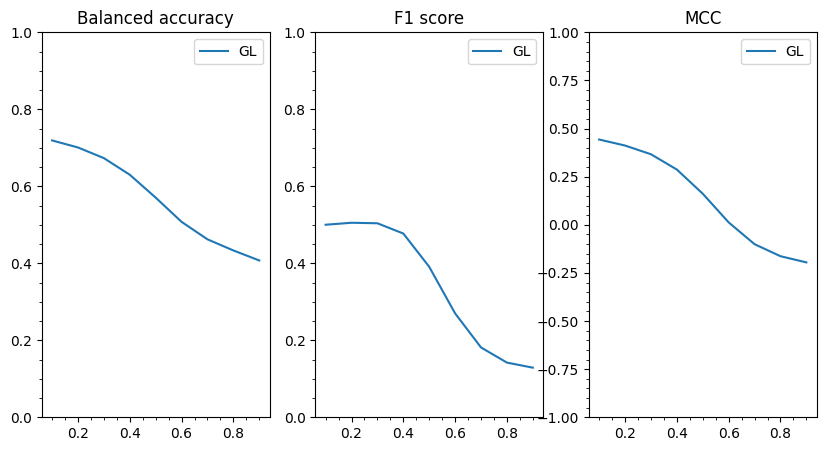

In [21]:
plt.subplot(1, 3, 1)
plt.plot(density_list, bacc_c[:, 0], label='GL')
plt.title('Balanced accuracy')
plt.minorticks_on()
plt.ylim((0, 1))
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(density_list, f1_c[:, 0], label='GL')
plt.title('F1 score')
plt.minorticks_on()
plt.ylim((0, 1))
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(density_list, mcc_c[:, 0], label='GL')
plt.title('MCC')
plt.minorticks_on()
plt.ylim((-1, 1))
plt.legend()

plt.gcf().set_size_inches((10, 5))
plt.show()